Documentación disponible en: https://es.overleaf.com/read/psdkdwqggknw#0a7603

# Segmentador de imágenes BEiT - MS

## Instrucciones
Here is how to use this model for semantic segmentation:

```python
from transformers import BeitFeatureExtractor, BeitForSemanticSegmentation
from datasets import load_dataset
from PIL import Image

# load ADE20k image
ds = load_dataset("hf-internal-testing/fixtures_ade20k", split="test")
image = Image.open(ds[0]['file'])

feature_extractor = BeitFeatureExtractor.from_pretrained('microsoft/beit-base-finetuned-ade-640-640')
model = BeitForSemanticSegmentation.from_pretrained('microsoft/beit-base-finetuned-ade-640-640')

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
# logits are of shape (batch_size, num_labels, height/4, width/4)
logits = outputs.logits
```

Currently, both the feature extractor and model support PyTorch.

In [ ]:
# En la línea de abajo dice que no hay un 'datasets' entonces toca:
# !pip install datasets

In [7]:
from PIL import Image
# Carga tu imagen
image = Image.open(r"C:\Users\pc\Pictures\habitacion estudiante 2.jpg")
habitacion_no = Image.open(r"C:\Users\pc\Pictures\habitacion estudiante - NO.jpg") #se llama así porque esa imagen no funcionó

In [2]:
from transformers import BeitFeatureExtractor, BeitForSemanticSegmentation
import matplotlib.pyplot as plt
feature_extractor = BeitFeatureExtractor.from_pretrained('microsoft/beit-base-finetuned-ade-640-640')
model = BeitForSemanticSegmentation.from_pretrained('microsoft/beit-base-finetuned-ade-640-640')

C:\Users\pc\anaconda3\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\b\abs_bao0hdcrdh\croot\pytorch_1675190257512\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [3]:
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)

In [4]:
logits = outputs.logits

## Sugerencia para visualización de la imagen segmentada:
Explicado paso a paso
```python
# Importa la biblioteca Matplotlib para visualización
import matplotlib.pyplot as plt

# Logits contiene las predicciones crudas del modelo, asegúrate de que logits tenga el formato adecuado para tu modelo y tarea.

# Supongamos que tienes logits en el formato (batch_size, num_labels, height, width), donde:
# - batch_size es el número de imágenes en el lote.
# - num_labels es el número de clases de segmentación.
# - height y width son las dimensiones de la imagen.

# Por ejemplo, si solo tienes una imagen (batch_size=1):
# Supongamos que tienes 21 clases de segmentación (num_labels=21):
# Y que la imagen es de 640x640 píxeles:

# Visualizar la máscara de segmentación para la primera imagen del lote (si tienes más de una imagen, ajusta el índice):
segmentation_mask = logits[0]  # Obtén la máscara de segmentación de la primera imagen

# Supongamos que deseas visualizar la máscara de la clase 0 (cambia el índice según tus clases):
class_index = 0
segmentation_mask_for_class = segmentation_mask[class_index]

# Aplica una función de activación para obtener probabilidades o binarización según sea necesario:
# Por ejemplo, si deseas aplicar la función softmax para obtener probabilidades:
# import torch
# segmentation_mask_probs = torch.softmax(segmentation_mask_for_class, dim=0)

# Si solo deseas binarizar la máscara (por ejemplo, para una visualización simple):
threshold = 0.5  # Establece un umbral de binarización
segmentation_mask_binary = segmentation_mask_for_class > threshold

# Visualiza la máscara binaria:(Negro lo que identifica, blanco lo que ignora)
plt.imshow(segmentation_mask_binary, cmap='binary')
plt.show()
```
### Por otro lado, si lo que deseo es ver una imagen particular, es mejor el código:
```python
# Visualizar la máscara de segmentación
import matplotlib.pyplot as plt
plt.imshow(logits[0][0].detach().cpu().numpy(), cmap='viridis')  # Asegúrate de ajustar los índices según tu formato de salida
plt.show()
```
Donde:

Este código asume que estás trabajando con un solo lote de imágenes (batch_size=1) y que deseas visualizar la máscara de segmentación para la primera imagen del lote ([0]). Además, asume que los logits están en un formato donde [0][0] se refiere a la máscara de segmentación de una clase específica para esa imagen.

El fragmento logits[0][0] se utiliza para acceder a la máscara de segmentación de la primera imagen y la clase específica (debes ajustar los índices según tu formato de salida). Luego, detach() se utiliza para desvincular el tensor de cualquier gráfico de cálculo de PyTorch, cpu() lo traslada a la CPU si estaba en la GPU y numpy() lo convierte en un arreglo NumPy para que pueda ser visualizado por Matplotlib.

In [8]:
inputs2 = feature_extractor(images=habitacion_no, return_tensors="pt")
outputs2 = model(**inputs2)
logits2 = outputs2.logits

ValueError: operands could not be broadcast together with shapes (4,640,640) (3,) 

tamaño de la imagen (686, 686)


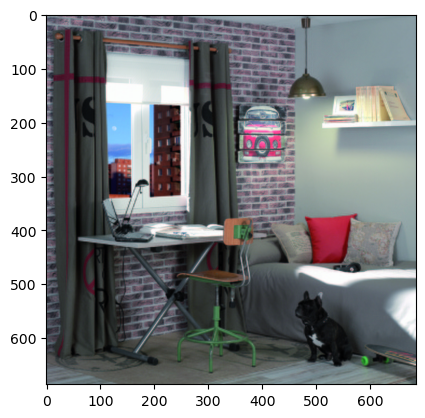

In [11]:
# Quería intentar visualizar la imagen "habitación 1" que descargué de internet.
plt.imshow(habitacion_no)
print ('tamaño de la imagen',habitacion_no.size)

'''Si ejecutó la celda anterior, notará
que arroja un error:
    "ValueError: operands could not be broadcast together with shapes (4,640,640) (3,)"
Lo cual para mí no tuvo sentido, pues el tamaño real de la imagen es (686,686) por lo cual 
el modelo debería ajustarla automaticamente, tal como lo hace con las imágenes de las celdas siguientes:'''

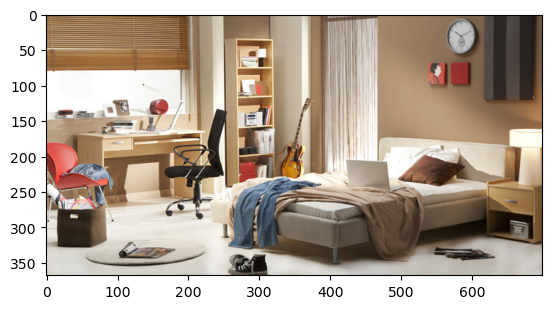

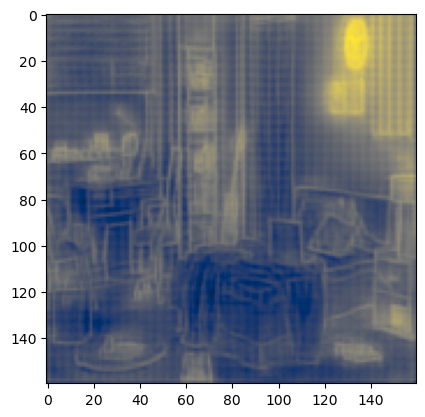

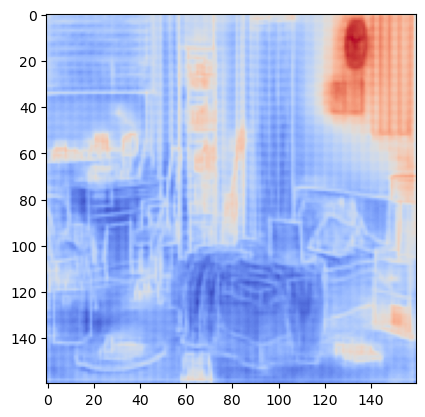

In [6]:
''' voy a intentar visualizar la imagen "habitación de adolescente" que descargué de internet. Al ejecutarla en la pag web de Hugging Face 
ya me hice a una idea de lo que debería ver a continuación '''
plt.imshow(image)
plt.show()
# (Original)
ind = 148 # reloj
plt.imshow(logits[0][ind].detach().cpu().numpy(), cmap='cividis')
plt.show()
# (Mapa azul)
# Asegúrate de ajustar los índices según tu formato de salida
plt.imshow(logits[0][ind].detach().cpu().numpy(), cmap='coolwarm') 
plt.show()
# (Mapa de calor)

## Punto 2.1 Que identifique varios objetos:

Por supuesto, lo más sencillo es con un ciclo 'for' como el siguiente:

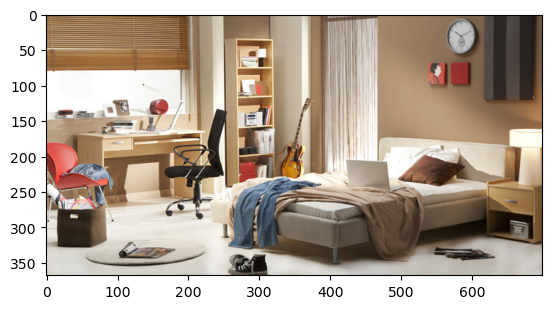

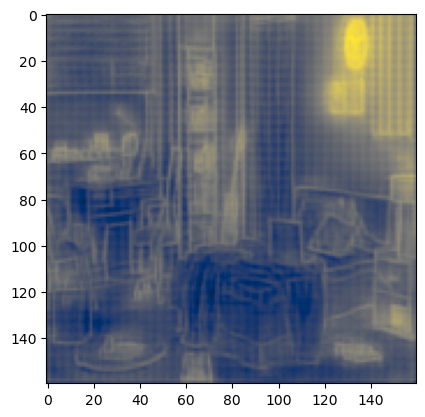

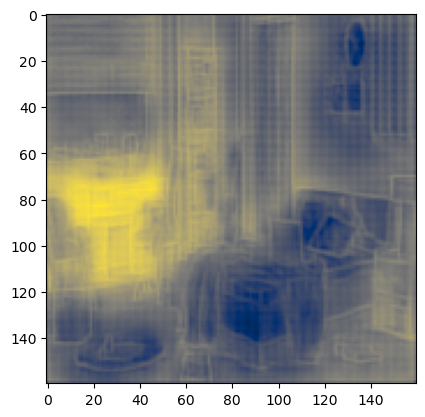

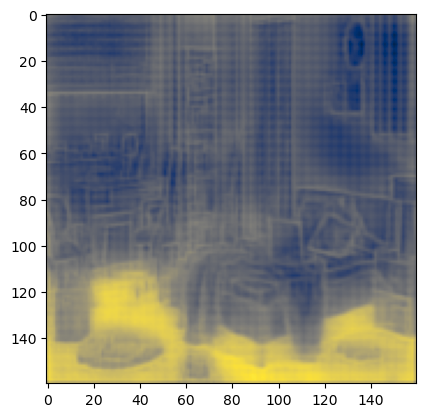

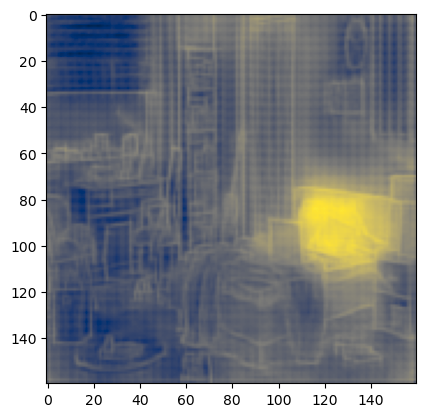

In [7]:
''' De la imagen "habitación" que descargué de internet, quiero especificarle que me identifique varios índices 
de varios objetos (por ahora escritos en enteros manualmente) '''
plt.imshow(image)
plt.show()
# (Original)
# [reloj, escritorio, piso, almohada] = [148,33,3,57]
indices = [148,33,3,57]
for ind in indices:
    #print(label2id[ind]) ----------- no está funcionando, quería que imprimiera el nombre según el índice
    plt.imshow(logits[0][ind].detach().cpu().numpy(), cmap='cividis')
    plt.show()


Sin embargo es claro que si uno quisiera identificar muchos más objetos, es incómodo que por cada objeto haya una imagen. Así pues, con ayuda de ChatGPT obtenemos el siguiente código

## Punto 2.2 Que identifique varios objetos:
Ahora con esos varios índices de varios objetos (que por ahora seguirán siendo escritos manualmente) buscamos que cada objeto lo realce pero en una misma imagen, no cada una por separado:

#### De antemano quiero advertir que los códigos a continuación no son funcionales
ChatGPT y yo los creamos, los modificamos, intentamos abordar este objetivo primero con códigos semejantes al anterior; luego creando máscaras de binarización; y finalmente con máscaras de segmentación que resaltaran el objeto deseado de algún color aleatorio, para luego "sobreponer" o "solapar" dichas máscaras en una sola.
(Verá que los códigos a continuación se pueden parecer entre sí, pero siempre tienen un cambio, por pequeño que sea)

He dejado estos códigos no funcionales en este Jupyter como una especie de "evidencia" del tiempo invertido en ellos.

Más allá de estos códigos no funcionales, no encontrará (al menos por ahora) nada más en este documento.
Por otro lado, en la documentación en LaTeX en overleaf, encontrará solo las conversaciones más relevantes con ChatGPT, a fin de "demostrarle que Chat entendía mi objetivo" a pesar de que los códigos que me sugería (y que yo le sugería) fallaran.


In [ ]:
plt.imshow(image)
plt.show()
# (Original)
# [reloj, escritorio, piso, almohada] = [148,33,3,57]
indices = [148,33,3,57]
'''
segmentation_mask = logits[0]  # Obtén la máscara de segmentación de la primera imagen

class_index = 148
segmentation_mask_for_class = segmentation_mask[class_index]

# Aplica una función de activación para obtener probabilidades o binarización según sea necesario:
# Por ejemplo, si deseas aplicar la función softmax para obtener probabilidades:
import torch
segmentation_mask_probs = torch.softmax(segmentation_mask_for_class, dim=0)

# Visualiza la máscara de ´robabilidad. 
plt.imshow(segmentation_mask_probs.detach().numpy(), cmap='cividis')
plt.show() 

# Establece un umbral de binarización
threshold = 0.5  
segmentation_mask_binary = segmentation_mask_for_class > threshold

# Visualiza la máscara binaria:
plt.imshow(segmentation_mask_binary, cmap='binary')
plt.show()
''' # esas líneas están comentadas pero funcionan bien. Son la muestra de la imagen binarizada

In [ ]:
''' (1er) '''
#import matplotlib.pyplot as plt
#import numpy as np
plt.imshow(image)
plt.show()
# (Original)

# Supongamos que tienes la máscara de segmentación para una imagen con múltiples clases
# La máscara debe ser un tensor de dimensiones (height, width), donde cada valor representa la clase.

# Define un colormap personalizado con colores diferentes para cada clase
# Puedes definir tus propios colores como una lista de tuplas (R, G, B) o usar colormaps predefinidos
# Aquí, usaremos colores de colormaps predefinidos para ejemplificar:

# [reloj, escritorio, piso, almohada] = [148,33,3,57]
indices = [148,33,3,57]
num_classes=len(indices)
colormap = plt.cm.get_cmap('tab20', num_classes)  # 'tab20' tiene 20 colores diferentes
segmentation_mask = logits[0]
class_index = 148
segmentation_mask_for_class = segmentation_mask[class_index]

# Supongamos que tienes num_classes clases en tu máscara de segmentación

# Visualiza la máscara de segmentación con colores asignados a cada clase
plt.imshow(colormap(segmentation_mask_for_class.detach().numpy()), cmap='tab20', vmin=0, vmax=num_classes - 1)
plt.colorbar()  # Agrega una barra de colores para mostrar la correspondencia entre clases y colores
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tienes la máscara de segmentación para una imagen con múltiples clases
# La máscara debe ser un tensor de dimensiones (height, width), donde cada valor representa la clase.

# Define un colormap personalizado con colores diferentes para cada clase
# Puedes definir tus propios colores como una lista de tuplas (R, G, B) o usar colormaps predefinidos
# Aquí, usaremos colores de colormaps predefinidos para ejemplificar:
num_classes = 3
colormap = plt.cm.get_cmap('tab20', num_classes)  # 'tab20' tiene 20 colores diferentes

# Supongamos que tienes num_classes clases en tu máscara de segmentación
class_indices = [57, 42, 30]  # Ejemplo de índices de clases

# Inicializa una máscara de colores con ceros y del mismo tamaño que la máscara
color_mask = np.zeros(segmentation_mask.shape + (3,), dtype=np.uint8)

for i, class_index in enumerate(class_indices):
    # Crea una máscara para la clase actual
    class_mask = (segmentation_mask == class_index)
    
    # Aplica el color correspondiente a la región de la clase en la máscara de colores
    color_mask[class_mask] = colormap(i / (num_classes - 1))[:3]  # Usa el colormap para asignar colores

# Abre la imagen original
original_image = Image.open(r"C:\Users\pc\Pictures\habitacion estudiante 2.jpg")

# Redimensiona la imagen al tamaño de color_mask
original_image = original_image.resize((color_mask.shape[1], color_mask.shape[0]))

# Combina el resultado en la imagen original
original_image_with_colors = np.array(original_image) + color_mask

# Visualiza la imagen original con colores asignados a cada clase
plt.imshow(original_image_with_colors)
plt.show()


'''
for i, index in enumerate(indices):
    color = object_colors[i]
    segmented_image = logits[0][index].detach().cpu().numpy()
    segmented_image = (segmented_image > 0.5) * color  # Aplica el color solo en la región del objeto
    # Combina el resultado en la imagen original
    original_image = original_image + segmented_image
plt.imshow(original_image)
plt.show()
# ... Tu código previo ...

# Inicializa una imagen de máscara con el mismo tamaño que la imagen segmentada
mask = np.zeros_like(segmented_image, dtype=np.uint8)
print(type(mask))
for i, index in enumerate(indices):
    color = object_colors[i]
    # Crea una máscara para el objeto actual
    object_mask = (segmented_image == index)
    # Aplica el color solo en la región del objeto
    mask[object_mask] = color
# Combina el resultado en la imagen original
original_image = original_image + mask

# ... Mostrar la imagen original ...
'''


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
''' 1) '''
# Supongamos que tienes la imagen original en una variable llamada "image"
# y logits que contiene las máscaras de segmentación (batch_size, num_labels, height, width).

# Elije las clases que deseas visualizar y los colores correspondientes.
# Por ejemplo, supongamos que deseas visualizar las clases 0, 1 y 2 con colores diferentes.
classes_to_visualize = [148,33,3,57]
colors = ['red', 'green', 'blue','orange']  # Asigna un color a cada clase.

# Selecciona la imagen y las máscaras de segmentación para la primera imagen en el lote.
image_to_visualize = image
masks_to_visualize = logits[0]

# Crea una máscara de colores en blanco y negro para superponer.
# Inicialmente, todo en blanco (valor 255) para la imagen original.
colored_mask = np.ones_like(image_to_visualize) * 255

# Redimensiona la máscara para que coincida con el tamaño de la imagen.
# Esto asume que las dimensiones de la máscara son diferentes de las de la imagen.
# Ajusta estas líneas según tus dimensiones específicas.
colored_mask = np.transpose(colored_mask, (1, 2, 0))
threshold = 0.5
# Superpone las máscaras de colores para las clases seleccionadas.
for class_idx, color in zip(classes_to_visualize, colors):
    # Crea una máscara binaria para la clase actual.
    class_mask = masks_to_visualize[class_idx] > threshold  # Aplica un umbral si es necesario.
    
    # Asigna el color correspondiente a los píxeles de la máscara de colores.
    colored_mask[class_mask] = plt.cm.colors.to_rgba(color)[:-1] * 255

# Redimensiona la máscara nuevamente a las dimensiones originales.
colored_mask = np.transpose(colored_mask, (2, 0, 1))

# Visualiza la imagen con las clases marcadas en colores diferentes.
plt.imshow(colored_mask.astype(np.uint8))
plt.show()

In [ ]:
# pip install scipy

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
''' 2) '''
from scipy.ndimage import zoom
# Supongamos que tienes la imagen original en una variable llamada "image"
# y logits que contiene las máscaras de segmentación (batch_size, num_labels, height, width).

# Elije las clases que deseas visualizar y los colores correspondientes.
# Por ejemplo, supongamos que deseas visualizar las clases 0, 1 y 2 con colores diferentes.
classes_to_visualize = [0, 1, 2]
colors = ['red', 'green', 'blue']  # Asigna un color a cada clase.

# Selecciona la imagen y las máscaras de segmentación para la primera imagen en el lote.
masks_to_visualize = logits[0]
image_to_visualize = image
print('tipo: ',type(image_to_visualize)) # es de tipo 'PIL.JpegImagePlugin.JpegImageFile'
'''debo transformarla a una matriz o un tensor para que se solucione el error que arroja al no tener el atributo "shape" '''

#import numpy as np
#from PIL import Image

# Supongamos que tienes la imagen en una variable llamada "image"
image_np = np.array(image)  # Convierte la imagen de PIL a una matriz NumPy
'''Continuamos'''
# Obtén las dimensiones de la imagen original.
height, width, _ = image_np.shape

# Crea una máscara de colores en blanco y negro para superponer.
# Inicialmente, todo en blanco (valor 255) para la imagen original.
colored_mask = np.ones((height, width, 3), dtype=np.uint8) * 255



# ...

for class_idx, color in zip(classes_to_visualize, colors):
    # Crea una máscara binaria para la clase actual y redimensiona según las dimensiones de la imagen original.
    class_mask = masks_to_visualize[class_idx].cpu().numpy() > threshold  # Convierte el tensor a NumPy y aplica el umbral si es necesario

    # Redimensiona la máscara binaria al tamaño de colored_mask
    class_mask = zoom(class_mask.astype(np.uint8), (height / class_mask.shape[0], width / class_mask.shape[1], 1), order=0)

    class_mask = np.expand_dims(class_mask, axis=-1)  # Añade una dimensión de canal (1 canal).

    # Asigna el color correspondiente a los píxeles de la máscara de colores.
    colored_mask[class_mask > 0] = np.array(plt.cm.colors.to_rgba(color)[:-1]) * 255

# Visualiza la imagen con las clases marcadas en colores diferentes.
plt.imshow(colored_mask)
plt.show()


In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
''' 4) '''
# Supongamos que tienes la imagen original en una variable llamada "image"
# y logits que contiene las máscaras de segmentación (batch_size, num_labels, height, width).

# Elije las clases que deseas visualizar y los colores correspondientes.
# Por ejemplo, supongamos que deseas visualizar las clases 0, 1 y 2 con colores diferentes.
classes_to_visualize = [148, 33, 3]
colors = ['red', 'green', 'blue']  # Asigna un color a cada clase.

# Selecciona la imagen y las máscaras de segmentación para la primera imagen en el lote.
masks_to_visualize = logits[0]
image_to_visualize = image
print('tipo: ',type(image_to_visualize)) # es de tipo 'PIL.JpegImagePlugin.JpegImageFile'
'''debo transformarla a una matriz o un tensor para que se solucione el error que arroja al no tener el atributo "shape" '''

#import numpy as np
#from PIL import Image

# Supongamos que tienes la imagen en una variable llamada "image"
image_np = np.array(image)  # Convierte la imagen de PIL a una matriz NumPy
'''Continuamos'''
# Obtén las dimensiones de la imagen original.
height, width, _ = image_np.shape
# Crea una máscara de colores en blanco y negro para superponer.
# Inicialmente, todo en blanco (valor 255) para la imagen original.
colored_mask = np.ones((height, width, 3), dtype=np.uint8) * 255

# Superpone las máscaras de colores para las clases seleccionadas.
for class_idx, color in zip(classes_to_visualize, colors):
    # Crea una máscara binaria para la clase actual y redimensiona según las dimensiones de la imagen original.
    class_mask = masks_to_visualize[class_idx] > threshold  # Aplica un umbral si es necesario.
    
    # Convierte la máscara binaria de PyTorch a un arreglo NumPy
    class_mask = class_mask.cpu().numpy()
    
    # Asigna el color correspondiente a los píxeles de la máscara de colores.
    colored_mask[class_mask > 0] = np.array(plt.cm.colors.to_rgba(color)[:-1]) * 255

# Visualiza la imagen con las clases marcadas en colores diferentes.
plt.imshow(colored_mask)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch 
''' 3) MAL''' 
# Supongamos que tienes la imagen original en una variable llamada "image"
# y logits que contiene las máscaras de segmentación (batch_size, num_labels, height, width).

# Elije las clases que deseas visualizar y los colores correspondientes.
# Por ejemplo, supongamos que deseas visualizar las clases 0, 1 y 2 con colores diferentes.
classes_to_visualize = [0, 1, 2]
colors = ['red', 'green', 'blue']  # Asigna un color a cada clase.

# Selecciona la imagen y las máscaras de segmentación para la primera imagen en el lote.
image_to_visualize = np.array(image)
masks_to_visualize = logits[0]

# Obtén las dimensiones de la imagen original.
height, width, _ = image_to_visualize.shape # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Crea una máscara de colores en blanco y negro para superponer.
# Inicialmente, todo en blanco (valor 255) para la imagen original.
colored_mask = np.ones((height, width, 3), dtype=np.uint8) * 255

# Superpone las máscaras de colores para las clases seleccionadas.
for class_idx, color in zip(classes_to_visualize, colors):
    # Crea una máscara binaria para la clase actual y redimensiona según las dimensiones de la imagen original.
    class_mask = masks_to_visualize[class_idx] > threshold  # Aplica un umbral si es necesario.
    
    # Convierte la máscara binaria de PyTorch a un arreglo NumPy
    class_mask = class_mask.cpu().numpy()
    
    # Asigna el color correspondiente a los píxeles de la máscara de colores.
    colored_mask[class_mask > 0] = np.array(plt.cm.colors.to_rgba(color)[:-1]) * 255

# Visualiza la imagen con las clases marcadas en colores diferentes.
plt.imshow(colored_mask)
plt.show()

In [ ]:
''' 5)''' 
# Supongamos que tienes la imagen original en una variable llamada "image"
# y logits que contiene las máscaras de segmentación (batch_size, num_labels, height, width).

# Elije las clases que deseas visualizar y los colores correspondientes.
# Por ejemplo, supongamos que deseas visualizar las clases 0, 1 y 2 con colores diferentes.
classes_to_visualize = [0, 1, 2]
colors = ['red', 'green', 'blue']  # Asigna un color a cada clase.

# Selecciona la imagen y las máscaras de segmentación para la primera imagen en el lote.
image_to_visualize = image
masks_to_visualize = logits[0]

# Crea una máscara de colores en blanco y negro para superponer.
# Inicialmente, todo en blanco (valor 255) para la imagen original.
colored_mask = np.ones_like(image_to_visualize) * 255

# Superpone las máscaras de colores para las clases seleccionadas.
for class_idx, color in zip(classes_to_visualize, colors):
    # Crea una máscara binaria para la clase actual.
    class_mask = masks_to_visualize[class_idx] > threshold  # Aplica un umbral si es necesario.
    
    # Asigna el color correspondiente a los píxeles de la máscara de colores.
    colored_mask[0, class_mask] = plt.cm.colors.to_rgba(color)[:-1] * 255

# Visualiza la imagen con las clases marcadas en colores diferentes.
plt.imshow(colored_mask[0])
plt.show()


In [ ]:
import cv2
import numpy as np
''' 6)''' 
# Supongamos que tienes la imagen original en una variable llamada "image"
# y logits que contiene las máscaras de segmentación (batch_size, num_labels, height, width).

# Elije las clases que deseas visualizar y los colores correspondientes.
# Por ejemplo, supongamos que deseas visualizar las clases 0, 1 y 2 con colores diferentes.
classes_to_visualize = [0, 1, 2]
colors = [(0, 0, 255), (0, 255, 0), (255, 0, 0)]  # Asigna un color BGR a cada clase.

# Selecciona la imagen y las máscaras de segmentación para la primera imagen en el lote.
image_to_visualize = image
masks_to_visualize = logits[0]

# Inicializa una imagen en blanco para superponer las máscaras de segmentación.
overlay = np.zeros_like(image_to_visualize)

# Superpone las máscaras de segmentación para las clases seleccionadas con colores.
for class_idx, color in zip(classes_to_visualize, colors):
    # Crea una máscara binaria para la clase actual.
    class_mask = masks_to_visualize[class_idx] > threshold  # Aplica un umbral si es necesario.
    
    # Superpone la máscara en la imagen en blanco.
    overlay[class_mask] = color

# Combina la imagen original y la superposición con transparencia.
alpha = 0.5  # Ajusta la transparencia según sea necesario.
result = cv2.addWeighted(image_to_visualize, 1 - alpha, overlay, alpha, 0)

# Visualiza el resultado.
cv2.imshow("Segmentation Result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
object_colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # Ejemplo de colores (rojo, verde, azul)
indices = [148, 33, 3]

# Inicializa una imagen de máscara con el mismo tamaño que la imagen segmentada
mask = np.zeros_like(segmented_image, dtype=np.uint8)

for i, index in enumerate(indices):
    color = object_colors[i]
    
    # Crea una máscara para el objeto actual
    object_mask = (segmented_image == index)
    
    # Aplica el color solo en la región del objeto
    mask[object_mask] = color

# Combina el resultado en la imagen original
original_image = original_image + mask

# ... Mostrar la imagen original ...
plt.imshow(original_image)
plt.show()

In [ ]:
import matplotlib.pyplot as plt, matplotlib
import numpy as np

# Supongamos que tienes logits que contienen las máscaras de segmentación.
# Y supongamos que tienes una lista de clases que deseas visualizar.
clases_a_visualizar = [0, 1, 2]  # Puedes ajustar esta lista según las clases que desees visualizar

# Crea una paleta de colores para cada clase (puedes personalizar los colores).
colores = ['red', 'green', 'blue']  # Ejemplo de colores para las clases

# Combinamos los colores para crear una paleta de colores para todas las clases posibles.
paleta = [colores[i] if i in clases_a_visualizar else 'black' for i in range(logits.shape[1])]

# Visualiza la máscara de segmentación para la primera imagen del lote.
imagen_segmentada = logits[0].detach().cpu().numpy()

# Crea una imagen RGB donde cada clase se representa con un color diferente.
imagen_rgb = np.zeros((imagen_segmentada.shape[0], imagen_segmentada.shape[1], 3), dtype=np.uint8)

for i, clase in enumerate(clases_a_visualizar):
    # Asigna el color correspondiente a la clase en la imagen RGB.
    imagen_rgb[imagen_segmentada[i] == 1] = np.array(matplotlib.colors.to_rgb(paleta[i])) * 255

# Visualiza la imagen segmentada con colores asignados a cada clase.
plt.imshow(imagen_rgb)
plt.show()


In [8]:
import matplotlib.pyplot as plt

# (Original)
# [reloj, escritorio, piso, almohada] = [148,33,3,57]
indices = [148, 33, 3, 57]
images_to_show = []

for ind in indices:
    # print(label2id[ind]) ----------- no está funcionando, quería que imprima el nombre según el índice
    image = logits[0][ind].detach().cpu().numpy()
    images_to_show.append((image, label2id[ind]))

# Mostrar todas las imágenes al final
plt.figure(figsize=(15, 5))
for i, (image, label) in enumerate(images_to_show, 1):
    plt.subplot(1, len(images_to_show), i)
    plt.imshow(image, cmap='cividis')
    plt.title(label)
    plt.axis('off')

plt.show()


NameError: name 'label2id' is not defined